In [9]:
%load_ext autoreload
%autoreload 2
%aimport -decode_fish.engine.place_psfs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# export
from decode_fish.imports import *

# os.environ["CUDA_VISIBLE_DEVICES"] = '1'

from decode_fish.funcs.file_io import *
from decode_fish.funcs.emitter_io import *
from decode_fish.funcs.utils import *
from decode_fish.funcs.dataset import *
from decode_fish.funcs.plotting import *
import shutil
from decode_fish.funcs.matching import *

from decode_fish.funcs.visualization import *

from omegaconf import open_dict
from hydra import compose, initialize
from decode_fish.funcs.merfish_eval import *

import h5py
from decode_fish.funcs.routines import *

initialize(config_path="../config")

ValueError: GlobalHydra is already initialized, call GlobalHydra.instance().clear() if you want to re-initialize

## Generate Data for comparison with ISTDECO

In [3]:
cfg = OmegaConf.load(f'../config/experiment/sim_2d_2.yaml')

crop_sz = 128
cfg.training.bs = 1
cfg.sim.random_crop.crop_sz = crop_sz
cfg.data_path.image_sim.image_shape = [1,16,1,crop_sz,crop_sz]

cfg.genm.prob_generator.low = .9999
cfg.genm.prob_generator.high = 1.

_, decode_dl = get_dataloader(cfg)
micro = load_psf_noise_micro(cfg)

Crop size larger than volume in at least one dimension. Crop size changed to (1, 128, 128)
1 volumes


/groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/lib/python3.8/site-packages/torch/cuda/__init__.py:122: UserWarning: 
    Found GPU2 NVS 510 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


In [4]:
codebook, targets = hydra.utils.instantiate(cfg.codebook)

In [5]:
out_dir = '/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/data/merfish_sims/sim_data5/'

densities = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2]
intensities = [1.]
# intensities = [0.8, 0.4, 0.2, 0.12]

In [6]:
from decode_fish.engine.point_process import *
from decode_fish.funcs.output_trafo import *
from decode_fish.funcs.routines import sim_data

gt_col = []
    
for d in densities:
    for i in intensities:
        
        point_process = PointProcessUniform(cfg.genm.intensity_dist.int_conc*i, cfg.genm.intensity_dist.int_rate, cfg.genm.intensity_dist.int_loc, n_channels=16, 
                                            sim_z=False, codebook=torch.tensor(codebook), int_option=1)
        
        k = f'dens_{d}_int_{i}'
        print(k)

        with h5py.File(out_dir+k+'.h5', 'w') as f:

            xsim, cols, gt_df = sim_data(decode_dl, micro, point_process, batches=10, n_codes=len(codebook), rate_fac=d)

            gt_df = px_to_nm(gt_df)
            gt_df = exclude_borders(gt_df, border_size_zyx=[0,500,500], img_size=[crop_sz*100,crop_sz*100,crop_sz*100])

            add_df_to_hdf5(f, 'locations', gt_df)          
            f.create_dataset('frames', data=cpu(xsim))
            
            free_mem()

/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None
/groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


dens_0.01_int_1.0


/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None


dens_0.025_int_1.0


/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None


dens_0.05_int_1.0


/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None


dens_0.075_int_1.0


/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None


dens_0.1_int_1.0


/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None


dens_0.125_int_1.0


/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None


dens_0.15_int_1.0


/groups/turaga/home/speisera/Dropbox (mackelab)/Artur/WorkDB/deepstorm/decode_fish/decode_fish/engine/point_process.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.codebook = torch.tensor(codebook).to(self.device) if codebook is not None else None


dens_0.2_int_1.0


In [12]:
out_dir = '/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/data/merfish_sims/sim_data5/'
files = glob.glob(out_dir+'/*.h5')
base_str = 'bsub -gpu "num=1" -q gpu_rtx -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/decode_fish/merfish_sim_eval.py '

with open('run_slurm.sh', 'w') as f:
    for n in files:
        name = n.split('/')[-1]
        print(base_str + f'data_file={name}' + ' \n')
        f.write(base_str + f'data_file={name}' + ' \n')

bsub -gpu "num=1" -q gpu_rtx -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/decode_fish/merfish_sim_eval.py data_file=dens_0.075_int_1.0.h5 

bsub -gpu "num=1" -q gpu_rtx -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/decode_fish/merfish_sim_eval.py data_file=dens_0.15_int_1.0.h5 

bsub -gpu "num=1" -q gpu_rtx -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/decode_fish/merfish_sim_eval.py data_file=dens_0.2_int_1.0.h5 

bsub -gpu "num=1" -q gpu_rtx -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/

In [130]:
out_dir = '/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/data/merfish_sims/sim_data5/'
intensities = [0]
files = glob.glob(out_dir+'sim_2d_2/*')

with h5py.File(files[0], 'r') as f:
    print(f.keys())
    print(f['hd'])

<KeysViewHDF5 ['hd', 'hd2', 'istdeco']>
<HDF5 group "/hd" (2 members)>


In [131]:
densities = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2]
intensities = [1.0]

with h5py.File(files[0], 'r') as f:
    mod_keys = list(f.keys())
    
mod_keys = ['hd', 'istdeco']
    
jacs = {k:np.zeros([len(intensities), len(densities)]) for k in mod_keys}
rmse = {k:np.zeros([len(intensities), len(densities)]) for k in mod_keys}

for f in files:
    
    k = f.split('/')[-1].split('.h5')[0] 
    print(k)
    d = k.split('_')[1]
    i = k.split('_')[3]
    
    if float(d) in densities:
    
        with h5py.File(f, 'r') as h:
            for m in mod_keys:

                perf = get_df_from_hdf5(h[m]['perf'])

                if float(i) in intensities:
                    jacs[m][intensities.index(float(i)),densities.index(float(d))] = perf['jaccard'].values[0]
                    rmse[m][intensities.index(float(i)),densities.index(float(d))] = perf['rmse_vol'].values[0]
                    
                if k == 'dens_0.1_int_1.0':
                    print(m)
                    display(perf)

dens_0.075_int_1.0
dens_0.15_int_1.0
dens_0.2_int_1.0
dens_0.025_int_1.0
dens_0.125_int_1.0
dens_0.1_int_1.0
hd


,eff_3d,jaccard,n_matches,precision,recall,rmse_vol,rmse_x,rmse_y,rmse_z
0,76.005085,0.827472,11717,0.971478,0.848075,33.352417,24.219868,22.929931,0.0


istdeco


,eff_3d,jaccard,n_matches,precision,recall,rmse_vol,rmse_x,rmse_y,rmse_z
0,37.597051,0.628221,10458,0.786967,0.756948,100.238395,70.992256,70.766062,0.0


dens_0.01_int_1.0
dens_0.05_int_1.0


Text(0.5, 0, 'Density')

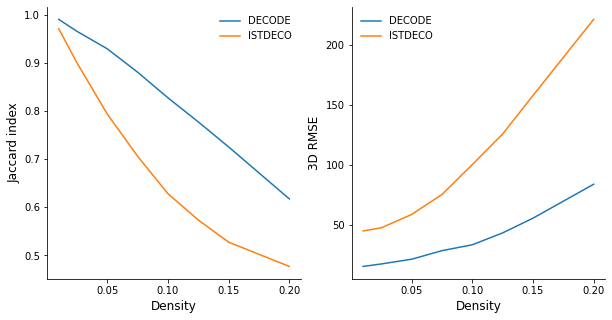

In [132]:
import seaborn as sns
labels = {'hd':'DECODE', 'istdeco':'ISTDECO'}

plt.figure(figsize=(10,5))
plt.subplot(121)
for i in range(len(intensities)):
    for m in mod_keys:
        plt.plot(densities, jacs[m][i], label=labels[m])
    plt.legend(frameon=False)
    
sns.despine()
plt.ylabel('Jaccard index', size=12)
plt.xlabel('Density', size=12)

plt.subplot(122)
for i in range(len(intensities)):
    for m in mod_keys:
        plt.plot(densities, rmse[m][i], label=labels[m])
    plt.legend(frameon=False)
    
sns.despine()
plt.ylabel('3D RMSE', size=12)
plt.xlabel('Density', size=12)

In [125]:
density = densities[2]
cfg = OmegaConf.load(f'../config/experiment/sim_2d_2.yaml')
codebook, targets = hydra.utils.instantiate(cfg.codebook)

with h5py.File(files[0], 'r') as f:
    mod_keys = list(f.keys())
    
with h5py.File(f'/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/data/merfish_sims/sim_data5/dens_{density}_int_1.0.h5', 'r') as f:

    gt_df = get_df_from_hdf5(f['locations'])

for f in [f'/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/data/merfish_sims/sim_data5/sim_2d_2/dens_{density}_int_1.0.h5']:
    with h5py.File(f, 'r') as h:

        dec_df = get_df_from_hdf5(h['hd']['locations'])
        ist_df = get_df_from_hdf5(h['istdeco']['locations_raw'])
        ist_df['loc_idx'] = np.arange(len(ist_df))
        
        perf, matches, _ = matching(gt_df, dec_df, tolerance=500, print_res=True, match_genes=True, allow_multiple_matches=False)
        dec_df.loc[:, 'class'] = 1
        dec_df.loc[dec_df['loc_idx'].isin(matches['loc_idx_pred']), 'class'] = 0
        dec_df = sel_int_ch(dec_df, codebook)
        
        perf, matches, _ = matching(gt_df, ist_df, tolerance=500, print_res=True, match_genes=True, allow_multiple_matches=False)
        ist_df.loc[:, 'class'] = 1
        ist_df.loc[ist_df['loc_idx'].isin(matches['loc_idx_pred']), 'class'] = 0

Recall: 0.939
Precision: 0.989
Jaccard: 92.931
RMSE_vol: 21.287
Eff_3d: 87.223
FN: 428.0 FP: 74.0
Num. matches: 6599.000
Shift: 0.07,0.18,0.00
Recall: 0.967
Precision: 0.499
Jaccard: 49.043
RMSE_vol: 54.433
Eff_3d: 42.231
FN: 234.0 FP: 6824.0
Num. matches: 6793.000
Shift: -0.07,0.19,0.00


In [126]:
perf, matches, _ = matching(dec_df, ist_df.nlargest(3500,'quality'), tolerance=500, print_res=True, match_genes=True, allow_multiple_matches=False, ignore_z=True)

Recall: 0.510
Precision: 0.973
Jaccard: 50.288
RMSE_vol: 47.243
Eff_3d: 44.961
FN: 3269.0 FP: 96.0
Num. matches: 3404.000
Shift: 0.09,0.31,0.00


Text(0, 0.5, 'N FP')

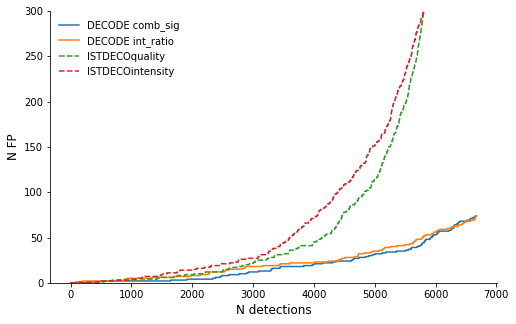

In [133]:
plt.figure(figsize=(8,5))
import seaborn as sns
for k in ['comb_sig','int_ratio']:
    b = False if k in ['tot_int','prob'] else True
    r  = make_roc(dec_df, k, ascending=b)
    plt.plot(r, label='DECODE '+k)

tra = ist_df[ist_df['intensity'] > 500]
for k in ['quality','intensity']:
    r  = make_roc(tra, k, ascending=False)
    plt.plot(r, label='ISTDECO' + k, linestyle='--')
    
plt.legend(frameon=False, fontsize=10)
plt.ylim(0,300)
sns.despine()

plt.xlabel('N detections', size=12)
plt.ylabel('N FP', size=12)